# Estimate a linear trend for the Hawai'i climate data

Uses the data in `data/hawaii-TAVG-Trend.txt` to estimate a linear trend. Saves the trend to `results/hawaii-trend.csv` and the estimated coefficients to `manuscript/trend-results.tex` for inclusion in the manuscript text.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load out custom tool for loading and processing the data
from mypackage.io import load_berkeley_earth_data
from mypackage.processing import LinearTrend

## Load the data

Read in the data as a pandas.DataFrame and show the first few rows.

In [2]:
data = load_berkeley_earth_data('../../data/hawaii-TAVG-Trend.txt')
data.head()

,month,monthly_anomaly,monthly_error,monthly_temperature,year,year_decimal
0,1,-0.772,1.002,21.678,1883,1883.000000
1,2,-0.591,1.760,21.859,1883,1883.083333
2,3,-0.372,0.841,22.078,1883,1883.166667
3,4,0.521,2.459,22.971,1883,1883.250000
4,5,0.323,1.854,22.773,1883,1883.333333


Make a quick plot.

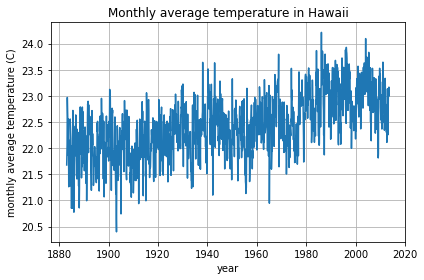

In [3]:
plt.figure()
plt.plot(data.year_decimal, data.monthly_temperature, '-')
plt.grid()
plt.xlabel('year')
plt.ylabel('monthly average temperature (C)')
plt.title('Monthly average temperature in Hawaii')
plt.tight_layout()

## Calculate the linear trend

Estimate a linear trend using the uncertainties as weights for the least-squares solution.

In [4]:
trend = LinearTrend().fit(data.year_decimal, data.monthly_temperature, data.monthly_error)
print(trend.linear_coef, trend.angular_coef)

2.4561432779937045 0.010244827457255972


Estimate the trend and plot it.

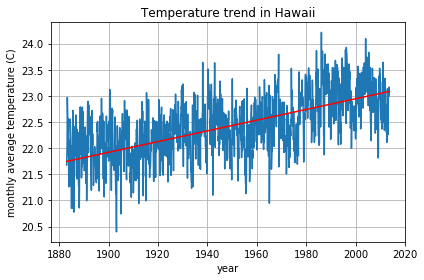

In [5]:
temperature_trend = trend.predict(data.year_decimal)

plt.figure()
plt.plot(data.year_decimal, data.monthly_temperature, '-')
plt.plot(data.year_decimal, temperature_trend, '-r')
plt.grid()
plt.xlabel('year')
plt.ylabel('monthly average temperature (C)')
plt.title('Temperature trend in Hawaii')
plt.tight_layout()

## Save the results

Save the estimate trend to a CSV file.

In [6]:
trend_data = pd.DataFrame({'year': data.year, 
                           'month': data.month, 
                           'temperature trend (C)': temperature_trend},
                          columns=['year', 'month', 'temperature trend (C)'])
trend_data.to_csv('../../results/hawaii-trend.csv')

Save the coefficients to a Latex file as new variables that can be used in the text.

In [7]:
# Need 3 {{{ because the first two become a single one for the Latex command. 
# The third is used by the format method.
tex = r"""
\newcommand{{\HawaiiLinearCoef}}{{{linear:.3f}}}
\newcommand{{\HawaiiAngularCoef}}{{{angular:.3f}}}
""".format(linear=trend.linear_coef, angular=trend.angular_coef)

with open('../../manuscript/hawaii_trend.tex', 'w') as f:
    f.write(tex)